In [51]:
import numpy as np
import matplotlib.pyplot as plt
import time
from MagicCube import MagicCube

In [ ]:
# Parameter
initialTemp = 1000
coolingRate = 0.99
maxIterations = 70000
n = 5

In [53]:
# Fungsi Simulated Annealing
def simulatedAnnealing(mc, initialTemp, coolingRate, maxIterations):

    # Menghasilkan kubus acak sebagai state awal
    currentCube = mc.generateRandomStates()
    mc.cube = currentCube
    currentObjective = mc.objectiveFunction()
    bestCube = currentCube.copy()
    bestObjective = currentObjective

    # List untuk melacak nilai selama iterasi
    temperatures = []
    objectives = []
    deltaEvalues = []
    neighbors = []  
    iterations = []  

    startTime = time.time()

    for iteration in range(maxIterations):

        # Menghitung suhu untuk iterasi saat ini
        temperature = initialTemp * (coolingRate ** iteration)
        if temperature <= 0:
            break

        # Memilih dua posisi acak dan nge swap menggunakan metode swapElements()
        pos1 = (np.random.randint(0, mc.n), np.random.randint(0, mc.n), np.random.randint(0, mc.n))
        pos2 = (np.random.randint(0, mc.n), np.random.randint(0, mc.n), np.random.randint(0, mc.n))
        mc.swapElements(pos1, pos2)

        # Evaluasi kubus baru (neighbor)
        newObjective = mc.objectiveFunction()
        deltaE = newObjective - currentObjective
        deltaEvalues.append(np.exp(-deltaE / temperature) if temperature > 0 else 0)

        # Menyimpan neighbor dan iterasi
        neighbors.append(newObjective)  
        iterations.append(iteration)  

        # Kondisi penerimaan solusi
        if deltaE < 0 or np.random.rand() < np.exp(-deltaE / temperature):
            currentCube = mc.cube.copy()
            currentObjective = newObjective

            # Update kubus terbaik jika ditemukan solusi lebih baik
            if currentObjective < bestObjective:
                bestCube = currentCube.copy()
                bestObjective = currentObjective
        else:
            # Jika solusi baru tidak diterima, balikkan swap untuk kembali ke state sebelumnya
            mc.swapElements(pos1, pos2)

        # Menyimpan nilai untuk visualisasi
        temperatures.append(temperature)
        objectives.append(currentObjective)

        # Cek jika sudah magic cube (objective function = 0), keluar dari loop
        if mc.isValid():
            print("Magic Cube ditemukan dengan nilai objective function = 0!")
            break

    endTime = time.time()
    duration = endTime - startTime

    return bestCube, bestObjective, objectives, temperatures, deltaEvalues, neighbors, iterations, duration


In [54]:
# Menjalankan eksperimen
def runExperiment():
    for run in range(3):
        print(f"\n========= RUN {run + 1} =========")
        
        # Inisialisasi Magic Cube baru untuk setiap run
        mc = MagicCube(n)
        
        # Menampilkan state awal dari kubus
        print("STATE AWAL KUBUS :")
        mc.visualize()
        
        # Run algoritma Simulated Annealing
        bestCube, bestObjective, objectives, temperatures, deltaEvalues, neighbors, iterations, duration = simulatedAnnealing(
            mc, initialTemp, coolingRate, maxIterations
        )
        
        # Menampilkan neighbor dan iterasi
        for i in range(len(neighbors)):
            print(f"Iterasi {iterations[i]}: Current Objective = {objectives[i]}, Neighbor = {neighbors[i]}")

        # Menampilkan state akhir dari kubus
        print("\nSTATE AKHIR KUBUS :")
        mc.cube = bestCube
        mc.visualize()

        # Menampilkan nilai objective function akhir yang dicapai
        print(" - Nilai Objective Function Akhir:", bestObjective)

        # Menampilkan durasi proses pencarian
        print(" - Durasi Proses Pencarian:", duration, "detik")

        # Menghitung dan menampilkan frekuensi stuck di local optima
        stuckCount = sum(1 for i in range(1, len(objectives)) if objectives[i] == objectives[i - 1])
        print(" - Frekuensi Stuck di Local Optima:", stuckCount)

        print("\n PLOT OBJECTIVE FUNCTION TERHADAP ITERASI :")
        
        # Plot nilai objective function terhadap iterasi
        plt.plot(objectives)
        plt.title(f"Objective Function terhadap Iterasi (Run {run + 1})")
        plt.xlabel("Iterasi")
        plt.ylabel("Objective Function")
        plt.show()
        
        print("\n PLOT (e ^ (delta E / T)) TERHADAP ITERASI :")

        # Plot (e^(delta E / T)) terhadap iterasi
        plt.plot(deltaEvalues)
        plt.title(f"Plot (e^(delta E / T)) terhadap Iterasi (Run {run + 1})")
        plt.xlabel("Iterasi")
        plt.ylabel("(e^(delta E / T))")
        plt.show()
        



========= RUN 1 =========
STATE AWAL KUBUS :


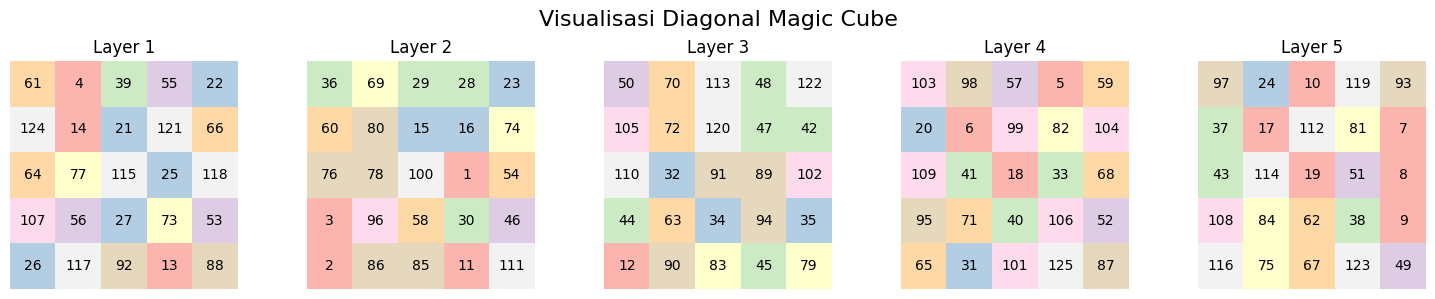

Objective function: 5562
Objective function: 5557
Objective function: 5557
Objective function: 5557
Objective function: 5557
Objective function: 5741
Objective function: 5741
Objective function: 5505
Objective function: 5505
Objective function: 5523
Objective function: 5523
Objective function: 5525
Objective function: 5525
Objective function: 5564
Objective function: 5564
Objective function: 5556
Objective function: 5556
Objective function: 5568
Objective function: 5568
Objective function: 5640
Objective function: 5640
Objective function: 5612
Objective function: 5612
Objective function: 5626
Objective function: 5626
Objective function: 5598
Objective function: 5598
Objective function: 5598
Objective function: 5598
Objective function: 5626
Objective function: 5626
Objective function: 5540
Objective function: 5540
Objective function: 5454
Objective function: 5454
Objective function: 5430
Objective function: 5430
Objective function: 5492
Objective function: 5492
Objective function: 5500


/var/folders/mm/qxk0j36n0xx3dqwlgzl5rfy40000gn/T/ipykernel_87956/2482273497.py:35: RuntimeWarning: overflow encountered in exp
  deltaEvalues.append(np.exp(-deltaE / temperature) if temperature > 0 else 0)


Objective function: 1435
Objective function: 1396
Objective function: 1396
Objective function: 1447
Objective function: 1396
Objective function: 1564
Objective function: 1396
Objective function: 1542
Objective function: 1396
Objective function: 1398
Objective function: 1396
Objective function: 1522
Objective function: 1396
Objective function: 1392
Objective function: 1392
Objective function: 1714
Objective function: 1392
Objective function: 1422
Objective function: 1392
Objective function: 1411
Objective function: 1392
Objective function: 2134
Objective function: 1392
Objective function: 1401
Objective function: 1392
Objective function: 1832
Objective function: 1392
Objective function: 1676
Objective function: 1392
Objective function: 1684
Objective function: 1392
Objective function: 1623
Objective function: 1392
Objective function: 1886
Objective function: 1392
Objective function: 1370
Objective function: 1370
Objective function: 1666
Objective function: 1370
Objective function: 1602


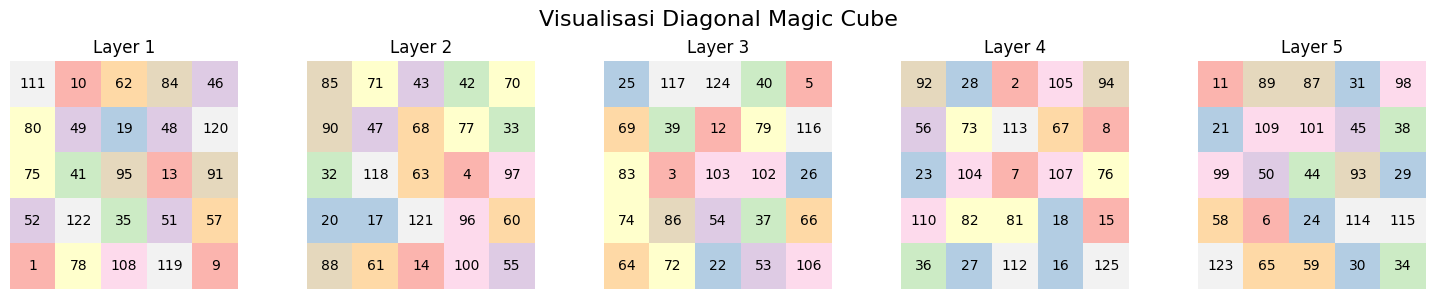

 - Nilai Objective Function Akhir: 472
 - Durasi Proses Pencarian: 3.3783469200134277 detik
 - Frekuensi Stuck di Local Optima: 9477

 PLOT OBJECTIVE FUNCTION TERHADAP ITERASI :


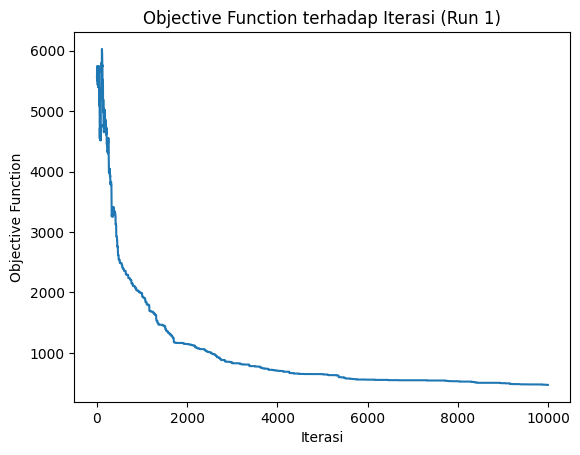


 PLOT (e ^ (delta E / T)) TERHADAP ITERASI :


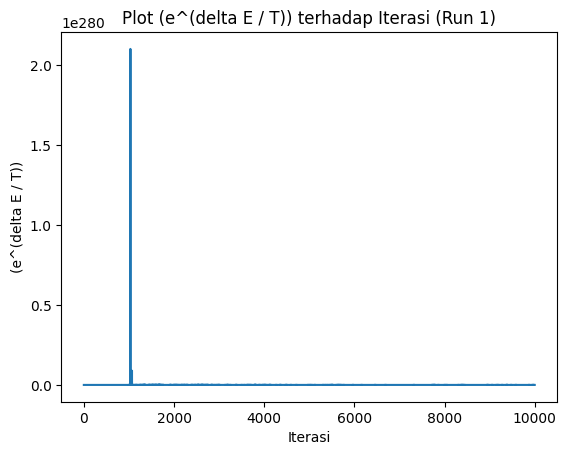


========= RUN 2 =========
STATE AWAL KUBUS :


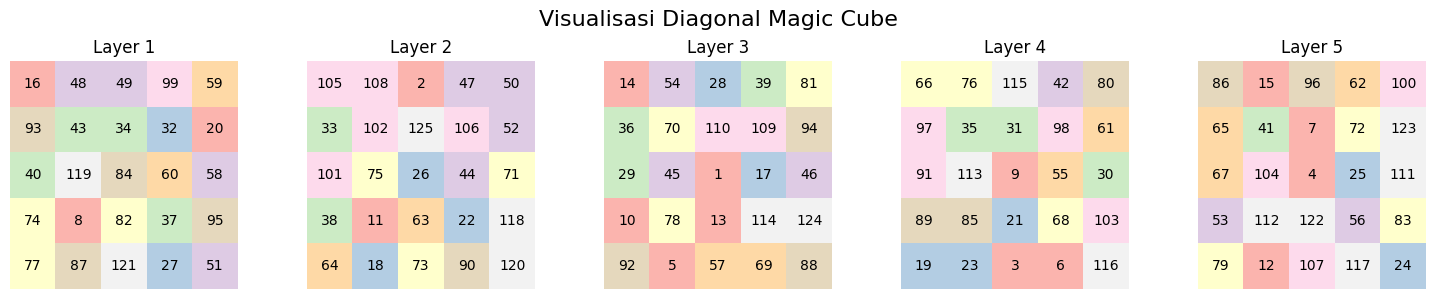

Objective function: 5380
Objective function: 5513
Objective function: 5513
Objective function: 5517
Objective function: 5517
Objective function: 5757
Objective function: 5757
Objective function: 5787
Objective function: 5787
Objective function: 5715
Objective function: 5715
Objective function: 5721
Objective function: 5721
Objective function: 5733
Objective function: 5733
Objective function: 5687
Objective function: 5687
Objective function: 5653
Objective function: 5653
Objective function: 5667
Objective function: 5667
Objective function: 5741
Objective function: 5667
Objective function: 5643
Objective function: 5643
Objective function: 5904
Objective function: 5904
Objective function: 5844
Objective function: 5844
Objective function: 5808
Objective function: 5808
Objective function: 5518
Objective function: 5518
Objective function: 5562
Objective function: 5562
Objective function: 5468
Objective function: 5468
Objective function: 5478
Objective function: 5478
Objective function: 5532


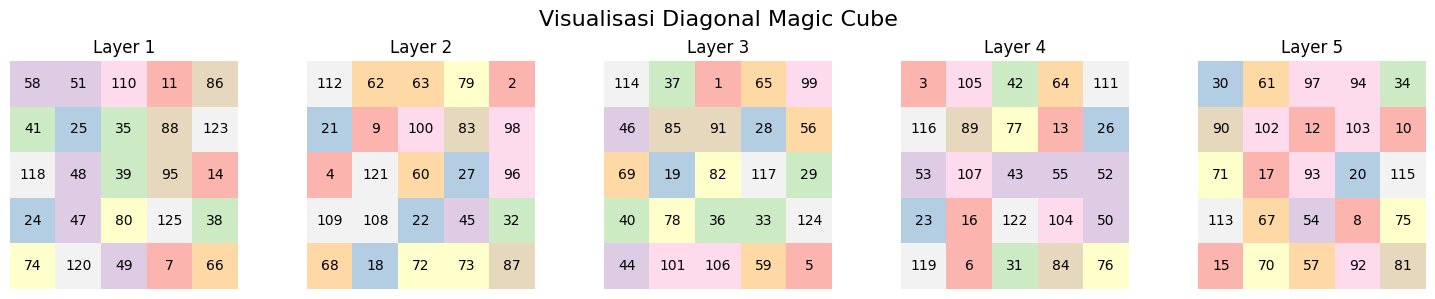

 - Nilai Objective Function Akhir: 367
 - Durasi Proses Pencarian: 3.3883769512176514 detik
 - Frekuensi Stuck di Local Optima: 9510

 PLOT OBJECTIVE FUNCTION TERHADAP ITERASI :


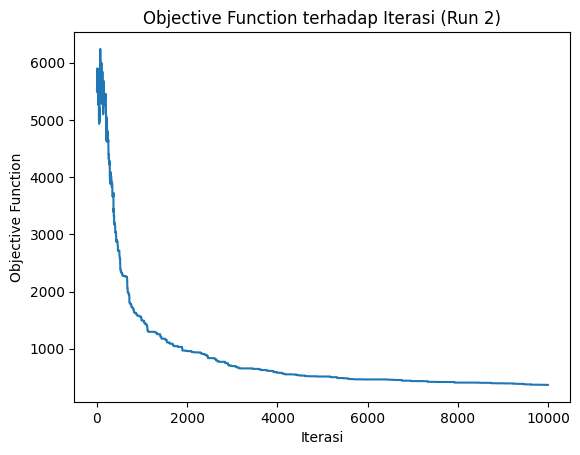


 PLOT (e ^ (delta E / T)) TERHADAP ITERASI :


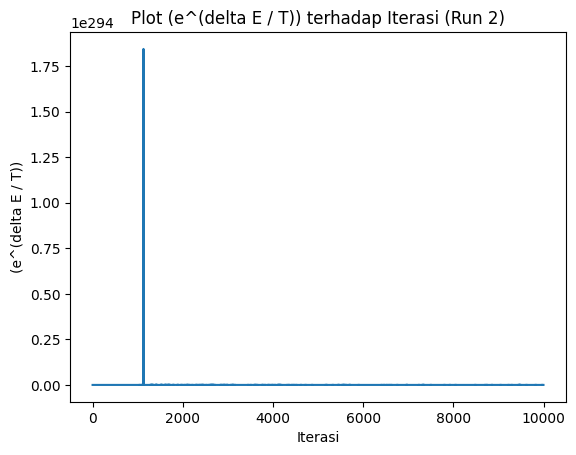


========= RUN 3 =========
STATE AWAL KUBUS :


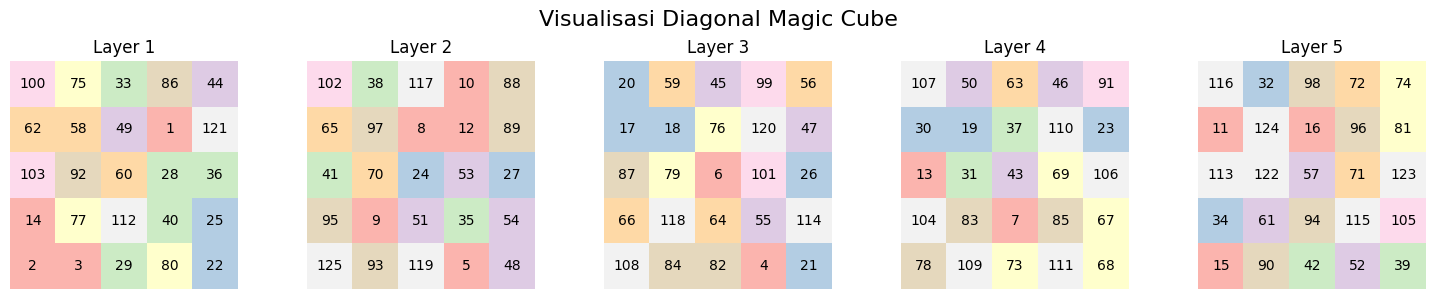

Objective function: 5118
Objective function: 5110
Objective function: 5110
Objective function: 5110
Objective function: 5110
Objective function: 5086
Objective function: 5086
Objective function: 5094
Objective function: 5094
Objective function: 4911
Objective function: 4911
Objective function: 5063
Objective function: 4911
Objective function: 5004
Objective function: 5004
Objective function: 5142
Objective function: 5142
Objective function: 5340
Objective function: 5340
Objective function: 5220
Objective function: 5220
Objective function: 5303
Objective function: 5303
Objective function: 5419
Objective function: 5419
Objective function: 5361
Objective function: 5361
Objective function: 5252
Objective function: 5252
Objective function: 5372
Objective function: 5372
Objective function: 5372
Objective function: 5372
Objective function: 5334
Objective function: 5334
Objective function: 5282
Objective function: 5282
Objective function: 5278
Objective function: 5278
Objective function: 5385


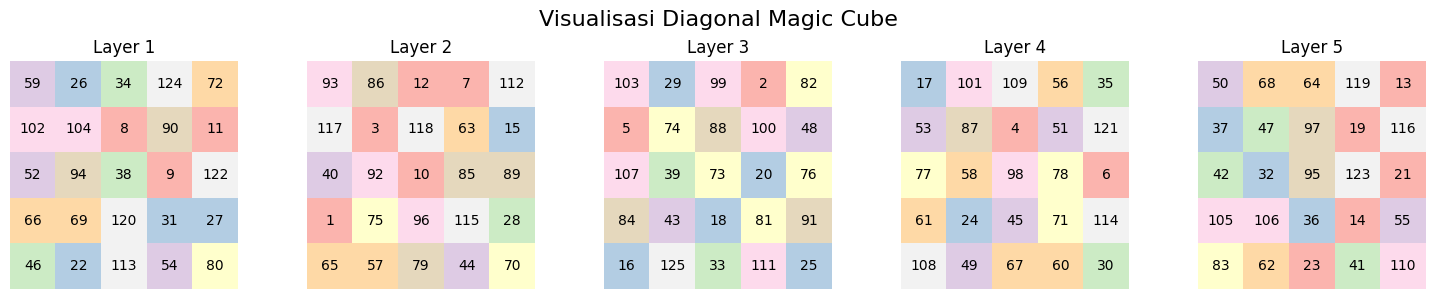

 - Nilai Objective Function Akhir: 400
 - Durasi Proses Pencarian: 3.321013927459717 detik
 - Frekuensi Stuck di Local Optima: 9504

 PLOT OBJECTIVE FUNCTION TERHADAP ITERASI :


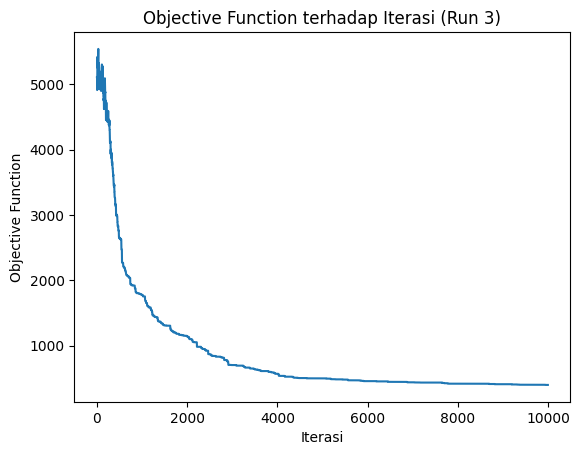


 PLOT (e ^ (delta E / T)) TERHADAP ITERASI :


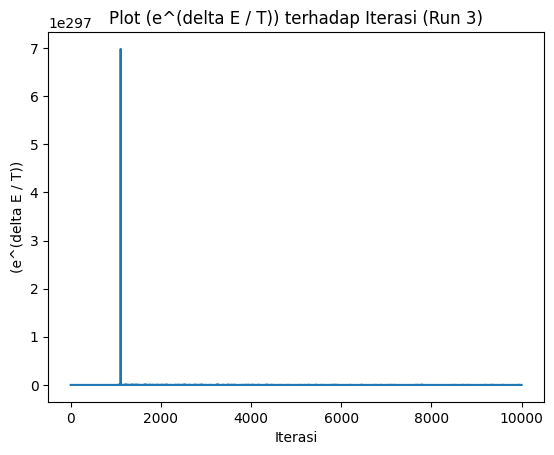

In [55]:
runExperiment()